In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
data = pd.read_csv('data/raw-data.csv')
data.head()

,Options,P-Treatment,N-Treatment,Trial,Stage,Dissolved O2,Greens,Cyanbacteria,Daphnia,Bosmina,Trout
0,1,1,2,1,Initial,3.5,73,242,15,5,5
1,1,1,2,1,Result,5.8,137,68,17,6,8
2,1,1,2,2,Initial,4.0,44,305,22,5,3
3,1,1,2,2,Result,5.1,3,211,19,0,7
4,1,1,2,3,Initial,4.2,127,156,25,3,5


In [10]:
initial_data = data[data['Stage'] == 'Initial']
result_data = data[data['Stage'] == 'Result']

initial_data = initial_data.reset_index(drop=True)
result_data = result_data.reset_index(drop=True)

result_data.head()

,Options,P-Treatment,N-Treatment,Trial,Stage,Dissolved O2,Greens,Cyanbacteria,Daphnia,Bosmina,Trout
0,1,1,2,1,Result,5.8,137,68,17,6,8
1,1,1,2,2,Result,5.1,3,211,19,0,7
2,1,1,2,3,Result,5.2,203,50,7,5,8
3,1 & 2,0,2,1,Result,8.0,63,30,14,5,8
4,1 & 2,0,2,2,Result,8.4,58,25,8,9,8


In [68]:
difference_data = pd.DataFrame(columns=list(data))
difference_data['Options'] = result_data['Options']
difference_data['P-Treatment'] = result_data['P-Treatment']
difference_data['N-Treatment'] = result_data['N-Treatment']
difference_data['Trial'] = result_data['Trial']
difference_data['Stage'] = 'Difference'

difference_data['Dissolved O2'] = result_data['Dissolved O2'] - initial_data['Dissolved O2']
difference_data['Greens'] = result_data['Greens'] - initial_data['Greens']
difference_data['Cyanbacteria'] = result_data['Cyanbacteria'] - initial_data['Cyanbacteria']
difference_data['Daphnia'] = result_data['Daphnia'] - initial_data['Daphnia']
difference_data['Bosmina'] = result_data['Bosmina'] - initial_data['Bosmina']
difference_data['Trout'] = result_data['Trout'] - initial_data['Trout']

# difference_data['Dissolved O2'] = (result_data['Dissolved O2'] - initial_data['Dissolved O2']) / initial_data['Dissolved O2']
# difference_data['Greens'] = (result_data['Greens'] - initial_data['Greens']) / initial_data['Greens']
# difference_data['Cyanbacteria'] = (result_data['Cyanbacteria'] - initial_data['Cyanbacteria']) / initial_data['Cyanbacteria']
# difference_data['Daphnia'] = (result_data['Daphnia'] - initial_data['Daphnia']) / initial_data['Daphnia']
# difference_data['Bosmina'] = (result_data['Bosmina'] - initial_data['Bosmina']) / initial_data['Bosmina']
# difference_data['Trout'] = (result_data['Trout'] - initial_data['Trout']) / initial_data['Trout']

difference_data.head()

,Options,P-Treatment,N-Treatment,Trial,Stage,Dissolved O2,Greens,Cyanbacteria,Daphnia,Bosmina,Trout
0,1,1,2,1,Difference,2.3,64,-174,2,1,3
1,1,1,2,2,Difference,1.1,-41,-94,-3,-5,4
2,1,1,2,3,Difference,1.0,76,-106,-18,2,3
3,1 & 2,0,2,1,Difference,5.4,35,-307,0,0,3
4,1 & 2,0,2,2,Difference,3.9,-52,-144,-13,-2,3


In [69]:
mean_data = pd.DataFrame(columns=list(data))
mean_data = mean_data.drop(['P-Treatment', 'N-Treatment', 'Stage', 'Trial'], axis=1)

mean_data['Options'] = difference_data['Options'].unique()

mean_data.head()

,Options,Dissolved O2,Greens,Cyanbacteria,Daphnia,Bosmina,Trout
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1 & 2,NaN,NaN,NaN,NaN,NaN,NaN
2,1 & 3,NaN,NaN,NaN,NaN,NaN,NaN
3,"1, 3 & 4",NaN,NaN,NaN,NaN,NaN,NaN
4,3 & 4,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
for i, option in enumerate(mean_data['Options']):
    temp = difference_data[difference_data['Options'] == option]
    for j, species in enumerate(list(mean_data)):
        if species != 'Options':
            mean_data.at[i, species] = temp[species].mean()
        if species == 'Dissolved O2':
            oxygen_data = result_data[result_data['Options'] == option]
            mean_data.at[i, species] = oxygen_data[species].mean()
            
mean_data.columns = ['Options', 'Dissolved O2', 'Green Algae', 'Cyanobacteria', 'Daphnia', 'Bosmina', 'Trout']
mean_data

,Options,Dissolved O2,Green Algae,Cyanobacteria,Daphnia,Bosmina,Trout
0,1,5.36667,33,-124.667,-6.33333,-0.666667,3.33333
1,1 & 2,8.03333,11.3333,-241.667,-14.6667,1.33333,3
2,1 & 3,5.5,3,-140.333,-2,0,0.333333
3,"1, 3 & 4",4.83333,-16,-77,-14,-0.666667,0
4,3 & 4,3.56667,-42.3333,110.333,-14.6667,-0.666667,5
5,3,3.76667,13.6667,18.6667,-11.6667,2.33333,0
6,"1, 2, & 3",7.43333,38.6667,-281,-22.3333,5.33333,3
7,"1, 2, 3, & 4",7.76667,16,-216.333,-24.6667,2.66667,0


## Visualization

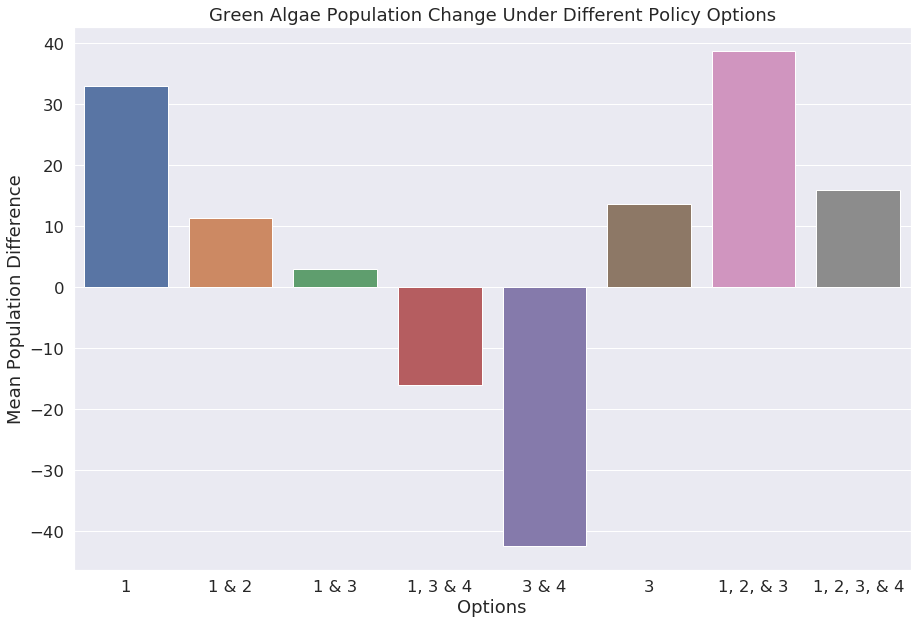

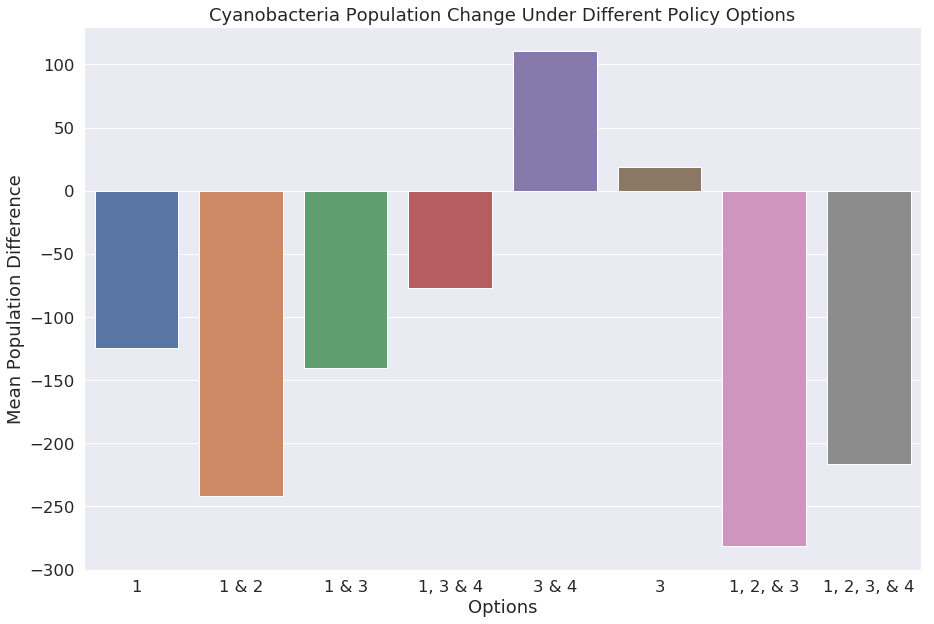

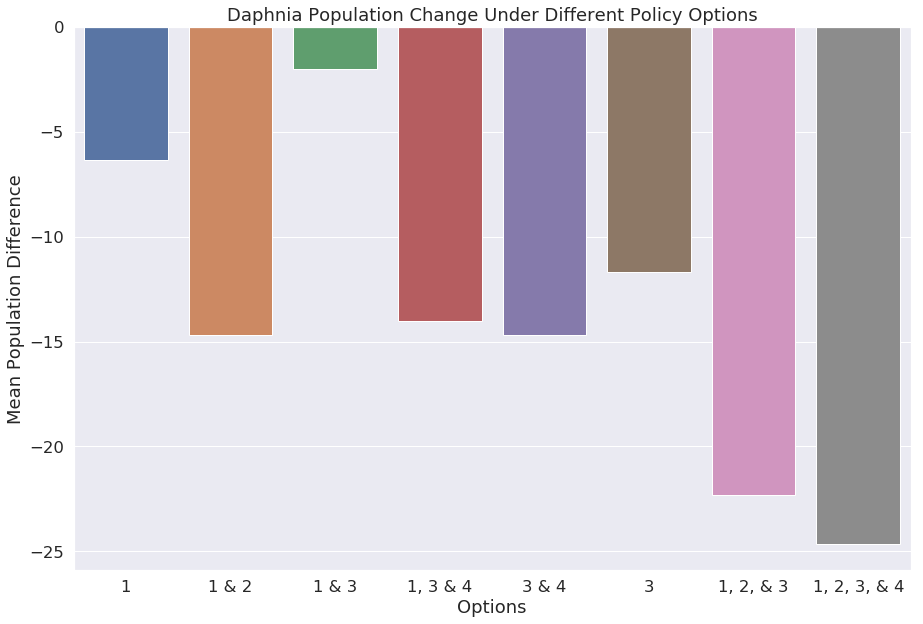

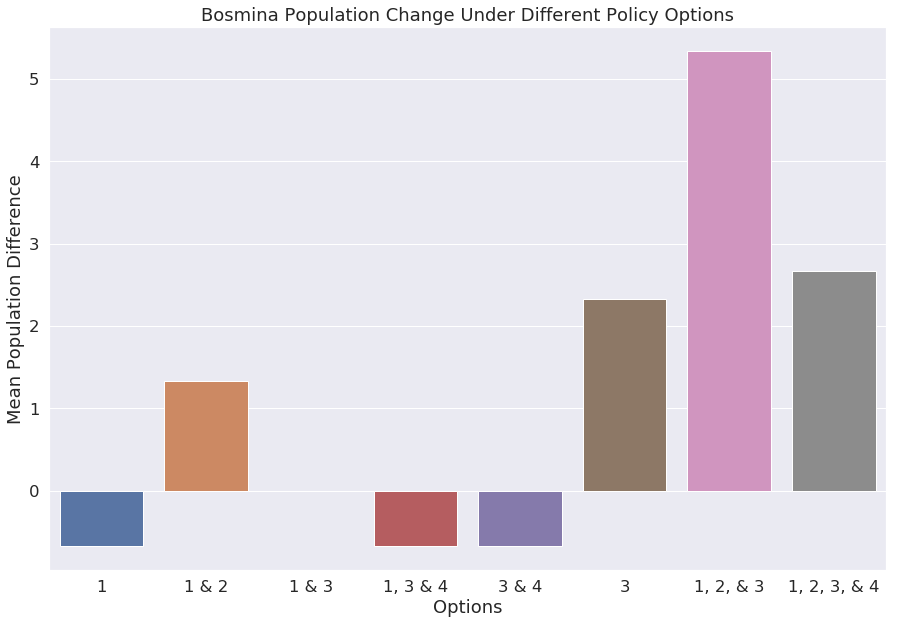

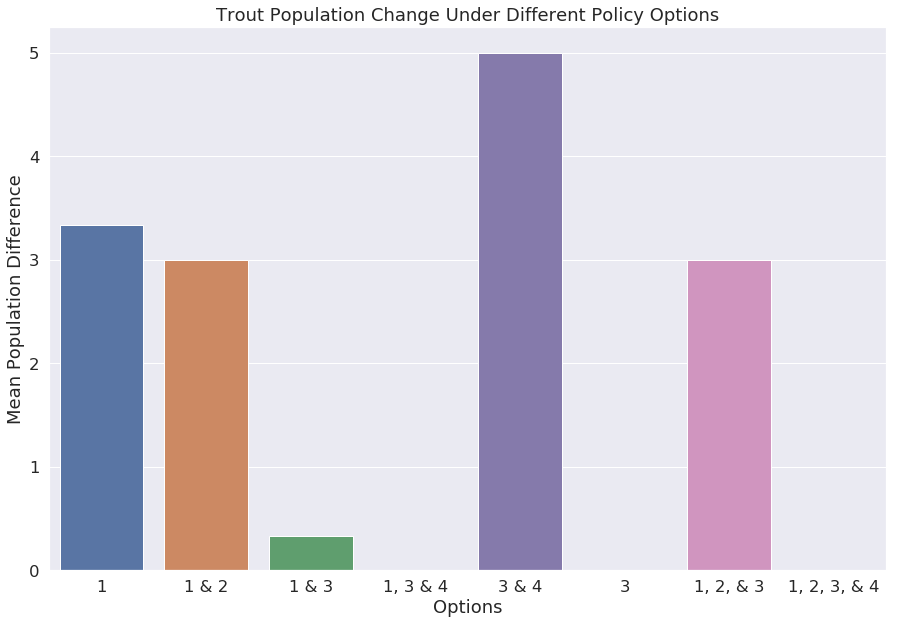

In [72]:
temp = mean_data.drop('Dissolved O2', axis=1)
temp = temp.melt(id_vars='Options')
# temp['value'] = temp['value'] * 100

for species in temp['variable'].unique():
    d = temp[temp['variable'] == species]
    plt.figure(figsize=(15,10))
    plt.title(species + ' Population Change Under Different Policy Options')
    sns.set(font_scale=1.5)
    sns.barplot(x='Options', y='value', data=d)
    plt.ylabel('Mean Population Difference')

Text(0,0.5,'Dissolved O2 Concentration (mg/L)')

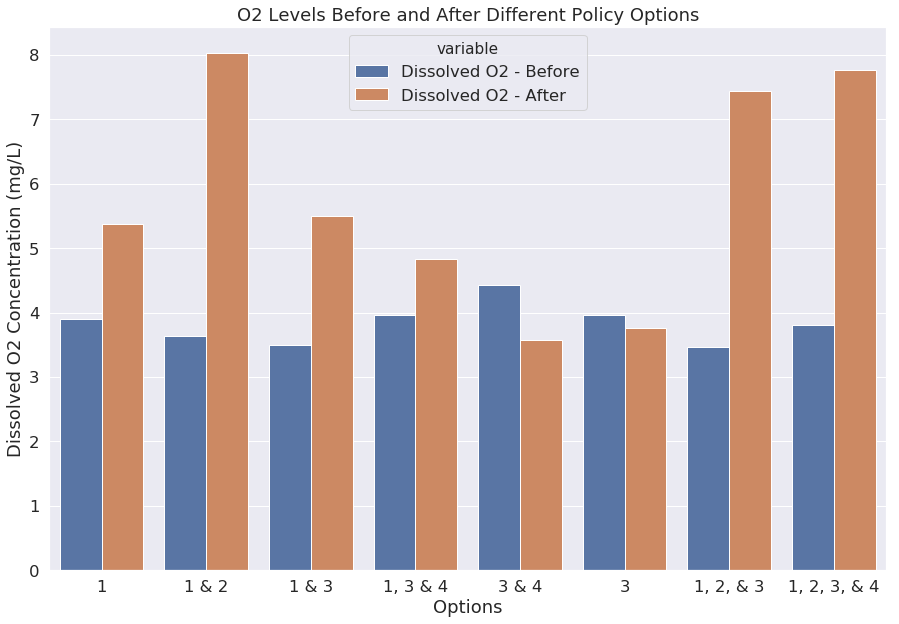

In [80]:
oxygen = pd.DataFrame(columns=['Options', 'Dissolved O2 - Before', 'Dissolved O2 - After'])
oxygen['Options'] = mean_data['Options']

initial_means = []
for option in oxygen['Options']:
    initial_means.append(initial_data[initial_data['Options'] == option]['Dissolved O2'].mean())
    
oxygen['Dissolved O2 - Before'] = initial_means
oxygen['Dissolved O2 - After'] = mean_data['Dissolved O2']

oxygen = oxygen.melt(id_vars='Options')

plt.figure(figsize=(15,10))
plt.title('O2 Levels Before and After Different Policy Options')
sns.set(font_scale=1.5)
sns.barplot(x='Options', y='value', hue='variable', data=oxygen)
plt.ylabel('Dissolved O2 Concentration (mg/L)')

In [102]:
column_list = list(data)
column_list.append('Time')
new = pd.DataFrame(columns=column_list)
new = new.drop(['P-Treatment', 'N-Treatment', 'Stage', 'Trial', 'Dissolved O2'], axis=1)

for i, option in enumerate(mean_data['Options']):
    temp = initial_data[initial_data['Options'] == option]
    new.at[i, 'Options'] = option
    new.at[i, 'Time'] = 'Initial'
    for j, species in enumerate(list(new)):
        if species not in ['Options', 'Time']:
            new.at[i, species] = temp[species].mean()

for i, option in enumerate(mean_data['Options']):
    temp = result_data[result_data['Options'] == option]
    i = i + 8
    new.at[i, 'Options'] = option
    new.at[i, 'Time'] = 'Result'
    for j, species in enumerate(list(new)):
        if species not in ['Options', 'Time']:
            new.at[i, species] = temp[species].mean()
            

new.columns = ['Options', 'Green Algae', 'Cyanobacteria', 'Daphnia', 'Bosmina', 'Trout', 'Time']

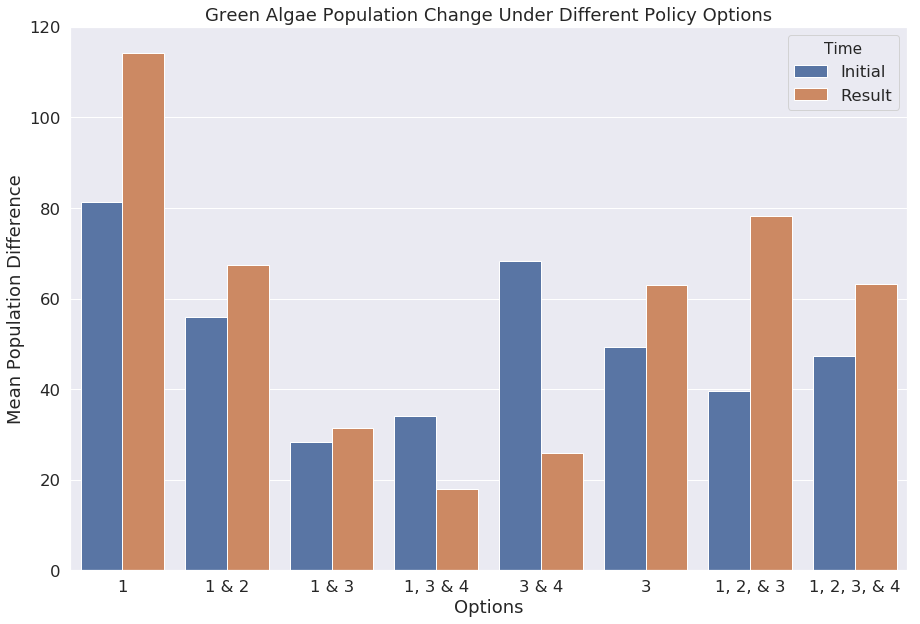

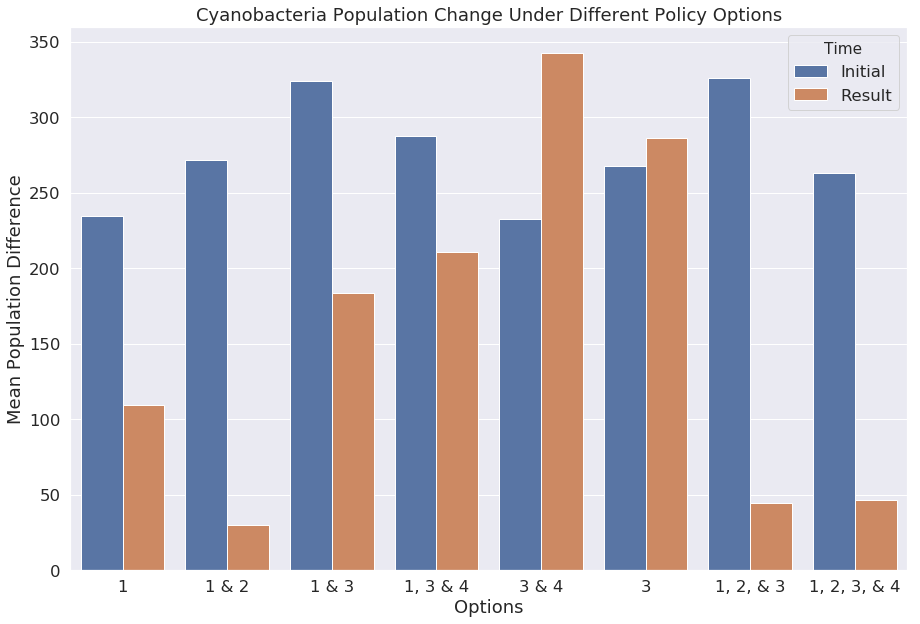

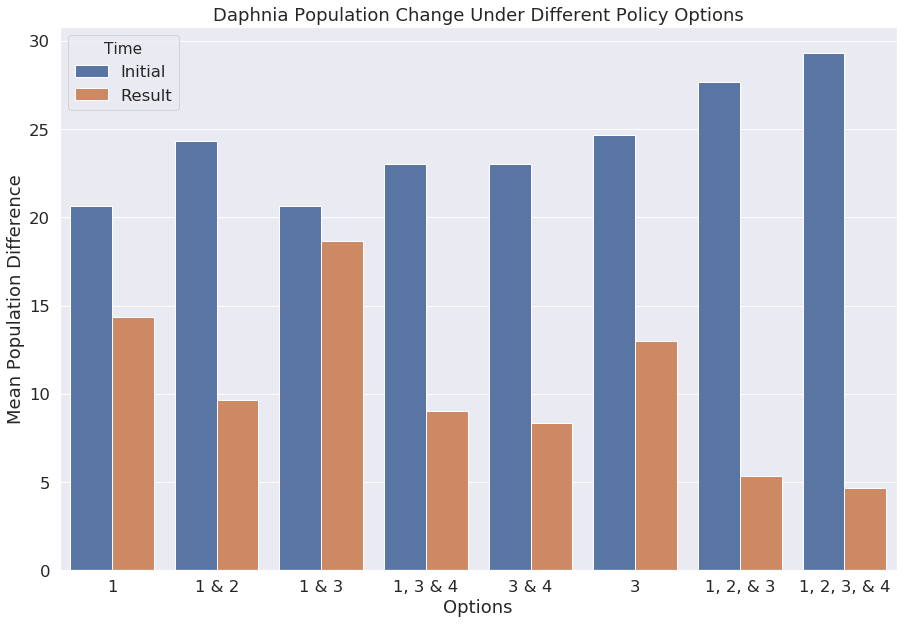

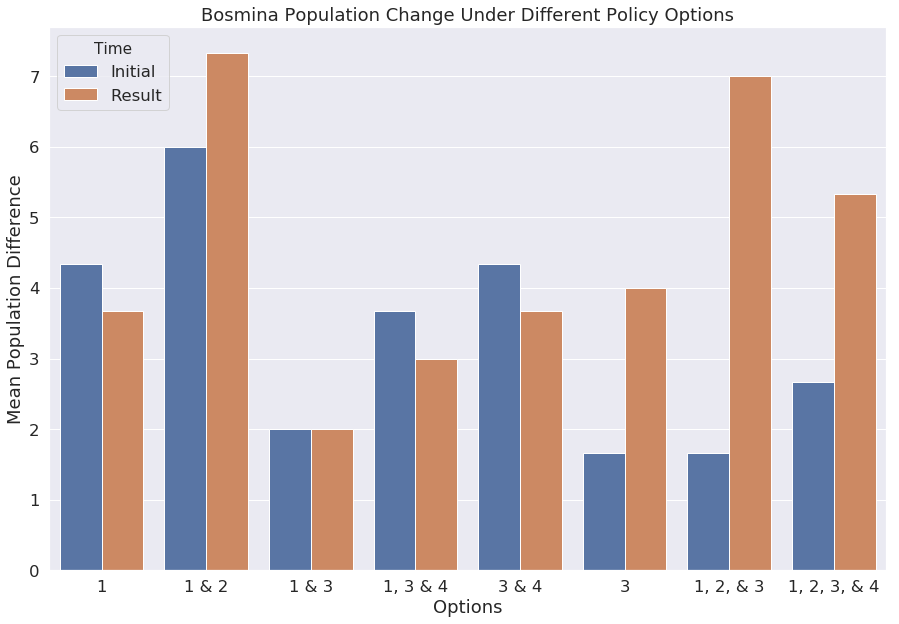

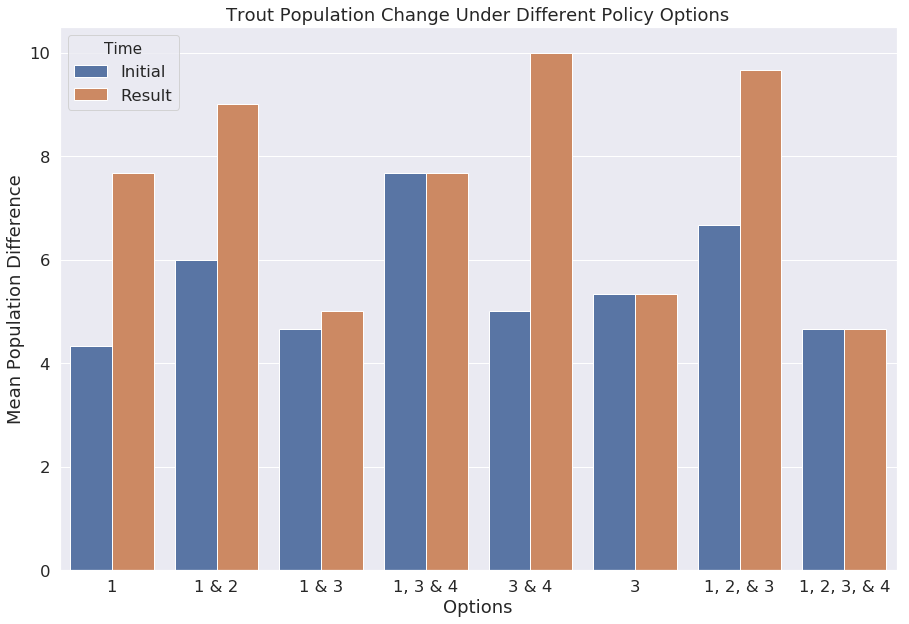

In [106]:

temp = new.melt(id_vars=['Options', 'Time'])
temp.columns = ['Options', 'Time', 'Species', 'Population']
for species in temp['Species'].unique():
    d = temp[temp['Species'] == species]
    plt.figure(figsize=(15,10))
    plt.title(species + ' Population Change Under Different Policy Options')
    sns.set(font_scale=1.5)
    sns.barplot(x='Options', y='Population', hue='Time', data=d)
    plt.ylabel('Mean Population Difference')